# PRELIMINARY TASK

Problem statement: The given dataset contains details about organic chemical compounds including their chemical features, isomeric conformation, names and the classes in which they are classified. The compounds are classified as either ‘Musk’ or ‘Non-Musk’ compounds. Your task is to build a classification model on the given data using any Deep Learning approach.

In [458]:
# Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

In [459]:
# importing data

data = pd.read_csv(r"C:\Users\Dell\Downloads\musk_csv.csv")

data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


# Quick Analysis

In [531]:
data.iloc[:,3:].describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,-44.495756,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,72.088903,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,-286.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,-96.750000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,-29.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,4.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,231.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


In [461]:
# Label Encoding 

from sklearn.preprocessing import LabelEncoder

categorical=['molecule_name','conformation_name']

label=LabelEncoder()

for i in categorical:
    data[i]=label.fit_transform(data[i])

M_name=len(data['molecule_name'].unique())
C_name=len(data['conformation_name'].unique())

print('\n-> Unique features in {}: {} and {}: {}'.format(categorical[0],M_name,categorical[1],C_name))

data.head()


-> Unique features in molecule_name: 102 and conformation_name: 6598


,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,0,684,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,0,685,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,0,686,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,0,687,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,0,688,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [462]:
# Checking for missing data

count=0

for index in range(len(data.columns)):
    if data.isnull().sum()[index]>=1:
        print('Missing value at: {}th position'.format(index))
        count=count+1    # update if 'true'
        
if count==0:
    print('Dataset is complete!!')

Dataset is complete!!


In [528]:
# Distribution of features: f1 to f166

skew=[]
kurt=[]

for col_index in range(1,len(data.columns)-3):
    skew.append(data['f%d'%col_index].skew())
    kurt.append(data['f%d'%col_index].kurt())
    
stats=pd.DataFrame({'Column Name':data.columns[3:-1],'Skewness':skew,'Kurtosis':kurt})    

print('\n-> The distribution looks highly skewed, so we must normalize the dataset.')

stats.head(10)


-> The distribution looks highly skewed, so we must normalize the dataset.


,Column Name,Skewness,Kurtosis
0,f1,2.886385,8.255158
1,f2,1.150784,0.030705
2,f3,0.417477,-1.302178
3,f4,0.575724,-0.960279
4,f5,5.413360,27.849616
5,f6,-0.503659,-0.310545
6,f7,-0.065586,-1.119841
7,f8,-0.521043,-0.449139
8,f9,-0.093965,-1.041928
9,f10,0.113788,1.098882


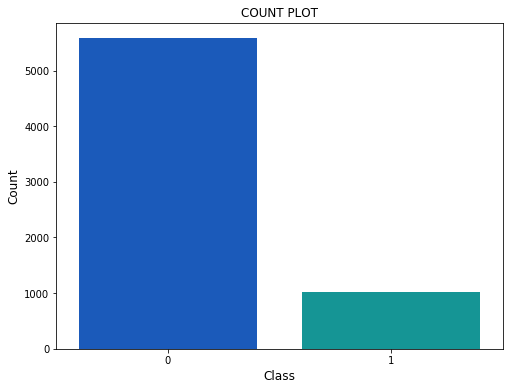

Seperate Count: 

-> Positive: 1017 or 15.41 % of the Dataset
-> Negative: 5581 or 84.59 % of the Dataset

The dataset is highly Imbalanced


In [464]:
pos=data[data['class']==1]
neg=data[data['class']==0]

plt.figure(figsize=(8,6))
plt.title('COUNT PLOT')
sns.countplot(data['class'],palette='winter')
plt.ylabel('Count',fontsize=12)
plt.xlabel('Class',fontsize=12)
plt.show()

pos_perc=round(len(pos)/len(data)*100,2)
neg_perc=round(len(neg)/len(data)*100,2)

print('Seperate Count: \n')
print('-> Positive: '+str(len(pos))+' or '+str(pos_perc)+' % of the Dataset')
print('-> Negative: '+str(len(neg))+' or '+str(neg_perc)+' % of the Dataset')

print('\nThe dataset is highly Imbalanced')

# Scaling the dataset

In [527]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scale = MinMaxScaler(feature_range=(0, 1))

musk_df=scale.fit_transform(data.iloc[:,3:-1])
data_scaled = pd.DataFrame(data=musk_df,columns=data.columns[3:-1])

data_scaled.head(5)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,0.23839,0.309524,0.431452,0.163636,0.002257,0.605744,0.534527,0.117431,0.604592,0.562863,...,0.032338,0.047393,0.680905,0.393293,0.299435,0.459906,0.150362,0.409247,0.530201,0.676611
1,0.22291,0.037415,0.088710,0.494545,0.002257,0.462141,0.583120,0.099083,0.525510,0.359768,...,0.054726,0.637441,0.545226,0.573171,0.419962,0.483491,0.173913,0.390411,0.489933,0.656325
2,0.23839,0.017007,0.088710,0.516364,0.002257,0.668407,0.583120,0.104587,0.525510,0.510638,...,0.047264,0.459716,0.163317,0.588415,0.495292,0.497642,0.166667,0.380137,0.474832,0.608592
3,0.22291,0.037415,0.088710,0.494545,0.002257,0.459530,0.583120,0.100917,0.525510,0.361702,...,0.052239,0.635071,0.540201,0.573171,0.421846,0.483491,0.172101,0.392123,0.491611,0.657518
4,0.22291,0.037415,0.088710,0.494545,0.002257,0.459530,0.583120,0.100917,0.525510,0.361702,...,0.052239,0.635071,0.540201,0.573171,0.421846,0.485849,0.172101,0.392123,0.491611,0.657518


# Dimensionality Reduction: PCA

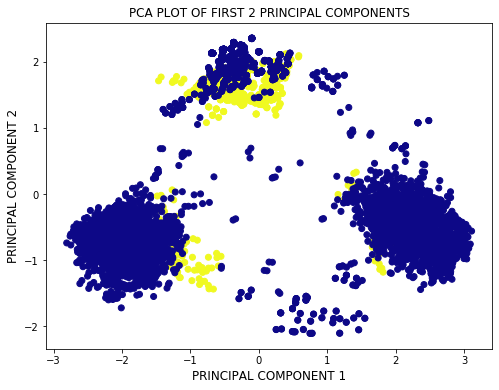


-> Total variance captured: 92.38 %



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,0.361871,1.931346,-0.541213,-0.143350,-0.040763,0.360332,-0.219396,-0.092489,0.211464,-0.603835,...,-0.103165,-0.467377,-0.294367,-0.028924,0.199536,-0.178362,0.268997,0.117330,0.168013,0.114289
1,-0.724685,1.688070,-0.163173,0.090640,0.450579,0.238865,0.242428,-0.277316,-0.049571,0.307912,...,-0.504264,-0.596843,0.393637,-0.110390,-0.178346,0.188480,-0.041636,-0.006859,-0.046821,-0.071520
2,-0.866981,1.611565,0.483963,-0.218820,0.258985,0.229696,0.322274,-0.178557,-0.091709,0.327445,...,-0.182894,-0.524280,0.482521,0.044244,-0.230222,0.003595,0.139742,-0.075533,-0.083372,-0.135226
3,-0.728044,1.691776,-0.156519,0.082877,0.443714,0.240119,0.242384,-0.270948,-0.046123,0.304356,...,-0.501809,-0.598043,0.393807,-0.109416,-0.182528,0.190382,-0.040115,-0.004408,-0.051423,-0.074228
4,-0.727653,1.692151,-0.155961,0.081963,0.442688,0.239638,0.242786,-0.270846,-0.045939,0.302816,...,-0.502304,-0.597982,0.393995,-0.108522,-0.183010,0.190185,-0.039549,-0.004097,-0.051506,-0.075675


In [516]:
# Principal Component Analysis: Feature Extraction

from sklearn.decomposition import PCA

pca=PCA(n_components=25,svd_solver='randomized')
data_reduced = pca.fit_transform(data_scaled)

plt.figure(figsize=(8,6))
plt.title('PCA PLOT OF FIRST 2 PRINCIPAL COMPONENTS')
plt.xlabel('PRINCIPAL COMPONENT 1',fontsize=12)
plt.ylabel('PRINCIPAL COMPONENT 2',fontsize=12)
plt.scatter(data_reduced[:,0],data_reduced[:,1],c=data['class'],cmap='plasma')
plt.show()

variance=pca.explained_variance_ratio_
total=0
for i in variance:
    total+=i
print('\n-> Total variance captured: '+str(np.round((total*100),2))+' %\n')   

#PC=pd.DataFrame(data=data_reduced,columns=['PC%d' %i for i in range(1,26)])
PC.head()

# Method 1: Machine Learning Classifier

In [468]:
X=PC
y=data['class']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7,shuffle=True)

In [469]:
classifier=GradientBoostingClassifier(n_estimators=400,learning_rate=0.1,loss='deviance')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [470]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1149
           1       0.81      0.95      0.87       171

    accuracy                           0.96      1320
   macro avg       0.90      0.96      0.93      1320
weighted avg       0.97      0.96      0.97      1320



In [471]:
from sklearn.model_selection import cross_val_score

#score=cross_val_score(model,X,y,cv=10,scoring='accuracy')

print('\nCV Score: {} | Standard Deviation: {} | Max Score: {} '.format(score.mean(),score.std(),score.max()))


CV Score: 0.8588111807307903 | Standard Deviation: 0.12094094509773233 | Max Score: 0.9939393939393939 



-> Heatmap of a confusion matrix:

Actual 	  |		Predicted
 
             Negative (0)  Positive(1)
Negative(0)          1110           39
Positive(1)             8          163


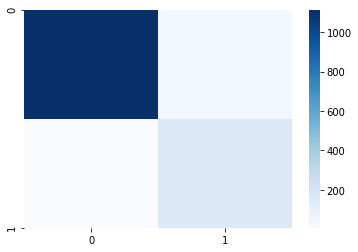

In [472]:
print('\n-> Heatmap of a confusion matrix:\n')
data_cm=confusion_matrix(y_pred,y_test)
heat=sns.heatmap(data_cm,cmap='Blues')
print('Actual \t  |\t\tPredicted\n ')
print(pd.DataFrame(data_cm,columns=['Negative (0)','Positive(1)'],index=['Negative(0)','Positive(1)']))

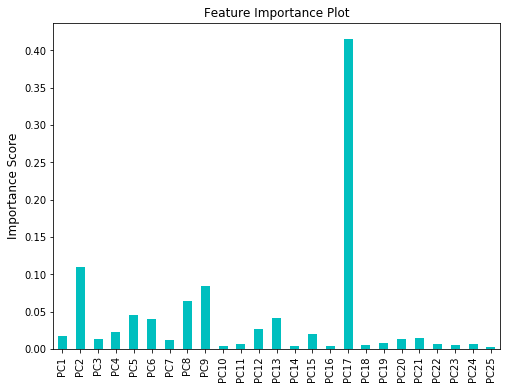

In [473]:
plt.figure(figsize=(8,6))
feature=pd.Series(model.feature_importances_,X.columns)
feature.plot(kind='bar',title='Feature Importance Plot',color='c')
plt.ylabel('Importance Score',fontsize=12)
plt.show()

# Model performance: roc curve

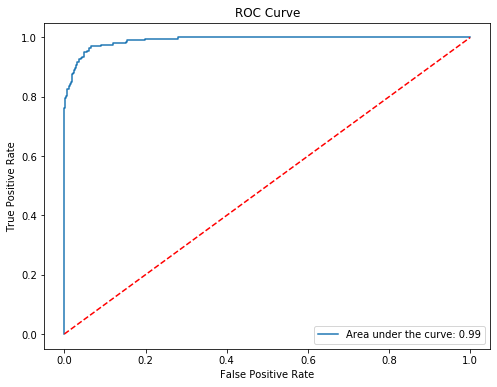

In [474]:
# ROC Curve

y_prob=model.predict_proba(X_test)

fpr,tpr,threshold = roc_curve(y_test,y_prob[:,1])
auc_score = roc_auc_score(y_test,yp[:,1])

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label='Area under the curve: %0.2f' %auc_score)
plt.plot([0,1],'r--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.xlim([0.0,1.0])
#plt.xlim([0.0,1.0])
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend(loc='lower right')
plt.show()

# Method 2: Deep Learning Classifier

In [475]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras import regularizers

In [476]:
# Features to be fed into the model

X=data_scaled
y=data['class']

# Splitting into train and test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7,shuffle=True)

In [477]:
data_scaled

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,0.238390,0.309524,0.431452,0.163636,0.002257,0.605744,0.534527,0.117431,0.604592,0.562863,...,0.032338,0.047393,0.680905,0.393293,0.299435,0.459906,0.150362,0.409247,0.530201,0.676611
1,0.222910,0.037415,0.088710,0.494545,0.002257,0.462141,0.583120,0.099083,0.525510,0.359768,...,0.054726,0.637441,0.545226,0.573171,0.419962,0.483491,0.173913,0.390411,0.489933,0.656325
2,0.238390,0.017007,0.088710,0.516364,0.002257,0.668407,0.583120,0.104587,0.525510,0.510638,...,0.047264,0.459716,0.163317,0.588415,0.495292,0.497642,0.166667,0.380137,0.474832,0.608592
3,0.222910,0.037415,0.088710,0.494545,0.002257,0.459530,0.583120,0.100917,0.525510,0.361702,...,0.052239,0.635071,0.540201,0.573171,0.421846,0.483491,0.172101,0.392123,0.491611,0.657518
4,0.222910,0.037415,0.088710,0.494545,0.002257,0.459530,0.583120,0.100917,0.525510,0.361702,...,0.052239,0.635071,0.540201,0.573171,0.421846,0.485849,0.172101,0.392123,0.491611,0.657518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,0.253870,0.258503,0.580645,0.021818,0.002257,0.827676,0.028133,0.563303,0.038265,0.499033,...,0.793532,0.620853,0.962312,0.371951,0.171375,0.415094,0.177536,0.419521,0.525168,0.702864
6594,0.232198,0.323129,0.596774,0.032727,0.002257,0.848564,0.015345,0.537615,0.051020,0.491296,...,0.788557,0.656398,0.967337,0.387195,0.508475,0.466981,0.153986,0.381849,0.476510,0.556086
6595,0.232198,0.329932,0.596774,0.036364,0.002257,0.665796,0.015345,0.532110,0.066327,0.529981,...,0.077114,0.990521,0.844221,0.390244,0.508475,0.469340,0.155797,0.381849,0.476510,0.554893
6596,0.253870,0.265306,0.580645,0.029091,0.002257,0.642298,0.025575,0.557798,0.053571,0.495164,...,0.047264,0.981043,0.798995,0.371951,0.167608,0.412736,0.177536,0.419521,0.523490,0.701671


In [478]:
# A Multilayer neural networks Model 

model = Sequential()

# Input with first hidden layer
model.add(Dense(units=80,input_dim=X_train.shape[1],activation='relu',kernel_initializer='he_uniform',
                kernel_regularizer=regularizers.l2(0.01))) # L2-norm to avoid overfitting

# Hidden Layer and dropout of 30%
model.add(Dense(units=100,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.3))

# Hidden Layer and dropout of 30%
model.add(Dense(units=120,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.3))

# Hidden Layer and dropout of 30%
model.add(Dense(units=80,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.3))

# Output layer (0/1)
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform'))

model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [479]:
# Training the model with batch_size=50 and epochs=1000

classifier = model.fit(X_train,y_train,validation_split=0.20,epochs=1000,batch_size=50,validation_data=(X_test,y_test))

Train on 5278 samples, validate on 1320 samples
Epoch 1/1000
5278/5278 [==============================] - 3s 588us/step - loss: 1.3956 - accuracy: 0.8456 - val_loss: 0.8723 - val_accuracy: 0.8985
Epoch 2/1000
5278/5278 [==============================] - 1s 167us/step - loss: 0.7052 - accuracy: 0.9045 - val_loss: 0.5091 - val_accuracy: 0.9242
Epoch 3/1000
5278/5278 [==============================] - 1s 138us/step - loss: 0.4876 - accuracy: 0.9233 - val_loss: 0.4179 - val_accuracy: 0.9295
Epoch 4/1000
5278/5278 [==============================] - 1s 135us/step - loss: 0.3869 - accuracy: 0.9297 - val_loss: 0.3264 - val_accuracy: 0.9371
Epoch 5/1000
5278/5278 [==============================] - 1s 149us/step - loss: 0.3268 - accuracy: 0.9388 - val_loss: 0.2878 - val_accuracy: 0.9439
Epoch 6/1000
5278/5278 [==============================] - 1s 130us/step - loss: 0.2964 - accuracy: 0.9390 - val_loss: 0.2785 - val_accuracy: 0.9288
Epoch 7/1000
5278/5278 [==============================] - 1s 146

In [480]:
score=model.evaluate(X,y)
print('\nLoss: {}'.format(score[0]))
print('Accuracy: {}'.format(score[1]))

6598/6598 [==============================] - 1s 99us/step

Loss: 0.08432071534823599
Accuracy: 0.9777204990386963


In [481]:
# Make Predictions 

pred=model.predict(X_test)
y_pred=(pred>0.5) # Taking 0.5 as a decision value

In [482]:
# Creating a dataframe of Loss and Accuracy

Results=pd.DataFrame(classifier.history).head()
Results

,val_loss,val_accuracy,loss,accuracy
0,0.872278,0.898485,1.395602,0.845585
1,0.509073,0.924242,0.705163,0.904509
2,0.417883,0.929545,0.487592,0.923266
3,0.326448,0.937121,0.386948,0.929708
4,0.287781,0.943939,0.326767,0.938803


# Evaluation

In [489]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1118
           1       0.94      0.87      0.90       202

    accuracy                           0.97      1320
   macro avg       0.96      0.93      0.94      1320
weighted avg       0.97      0.97      0.97      1320



In [490]:
print('F1 Score: {}'.format(f1_score(y_test,y_pred)))

F1 Score: 0.9048843187660667



-> Heatmap of a confusion matrix:

Actual 	  |		Predicted
 
             Negative (0)  Positive(1)
Negative(0)          1107           26
Positive(1)            11          176


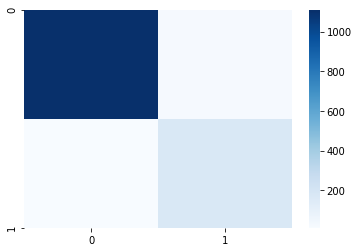

In [491]:
print('\n-> Heatmap of a confusion matrix:\n')
data_cm=confusion_matrix(y_pred,y_test)
heat=sns.heatmap(data_cm,cmap='Blues')
print('Actual \t  |\t\tPredicted\n ')
print(pd.DataFrame(data_cm,columns=['Negative (0)','Positive(1)'],index=['Negative(0)','Positive(1)']))

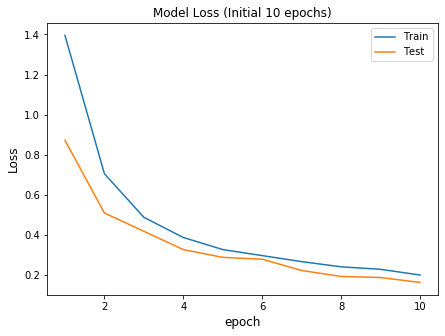

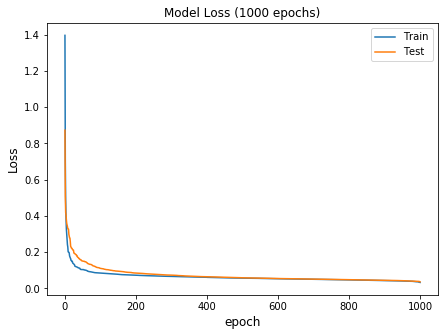

In [536]:
# Creating an organised lot
# for val_los, val_accuracy, loss and accuracy

Results=pd.DataFrame(classifier.history)

# Loss and Accuracy graphs

plt.figure(figsize=(7,5))
plt.title('Model Loss (Initial 10 epochs)')
plt.plot(np.arange(1,11),Results['loss'].head(10).sort_values(ascending=False),label='Train')
plt.plot(np.arange(1,11),Results['val_loss'].head(10).sort_values(ascending=False),label='Test')
plt.xlabel('epoch',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.legend(loc='best',fontsize=10)
plt.show()

plt.figure(figsize=(7,5))
plt.title('Model Loss (1000 epochs)')
plt.plot(np.arange(1,1001),Results['loss'].head(1000).sort_values(ascending=False),label='Train')
plt.plot(np.arange(1,1001),Results['val_loss'].head(1000).sort_values(ascending=False),label='Test')
plt.xlabel('epoch',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.legend(loc='best',fontsize=10)
plt.show()

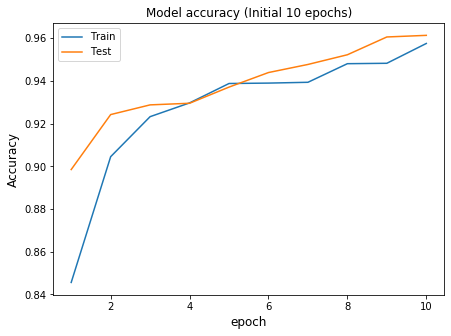

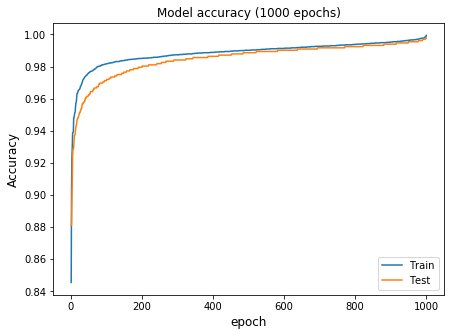

In [535]:
# Plotting Loss and Accuracy graphs

plt.figure(figsize=(7,5))
plt.title('Model accuracy (Initial 10 epochs)')
plt.plot(np.arange(1,11),Results['accuracy'].head(10).sort_values(ascending=True),label='Train')
plt.plot(np.arange(1,11),Results['val_accuracy'].head(10).sort_values(ascending=True),label='Test')
plt.xlabel('epoch',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(7,5))
plt.title('Model accuracy (1000 epochs)')
plt.plot(np.arange(1,1001),Results['accuracy'].head(1000).sort_values(ascending=True),label='Train')
plt.plot(np.arange(1,1001),Results['val_accuracy'].head(1000).sort_values(ascending=True),label='Test')
plt.xlabel('epoch',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.legend(loc='lower right')
plt.show()

# Model performance: roc curve

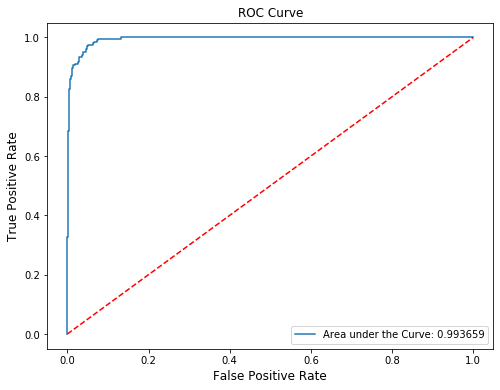

In [488]:
# Plotting roc curve and Area under the roc curve

fpr,tpr,threshold=roc_curve(y_test,pred)
area=roc_auc_score(y_test,pred)

plt.figure(figsize=(8,6))
plt.title('ROC Curve')
plt.plot(fpr,tpr,label='Area under the Curve: %f' %area)
plt.plot([0,1],'r--',c='r')
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.legend(loc='best')
plt.show()

Conclusion:

1. (i) Train and Validation loss is consistently decreasing.                                                                     (ii) Train and Validation accuracy is consistently increasing.                                                                    
2. F1-score came out to be around ~0.90 whereas precision and recall are 0.94 and 0.87 respectively.

3. L2 norm and Dropout regularization ensured that the model doesn't overfit.  

4. Area under the roc curve is 0.99 which means the model is more sensitive than specific. This implies
   the model is well trained and can generalize very well.

This is a bonafide work of Aarush Gandhi.

9953476948
Aarushgandhi999@gmail.com